<a href="https://colab.research.google.com/github/datajoedata/e-Commerce-Sales-Analysis-Target-Brazil/blob/main/tentativa_reg_log%C3%ADstica_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelo preditivo de Churn E-commerce (Target)

# I - Montagem do drive e carregamento dos dados:

In [ ]:
from google.colab import drive
from zipfile import ZipFile
import os
import pandas as pd
from IPython.display import display
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Descompacta arquivos

zip_path = '/content/drive/MyDrive/Analise_de_Vendas_E-commerce/archive (2).zip'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Lista arquivos descompactados
files = os.listdir('/content/')
print(files)


['.config', 'products.csv', 'orders.csv', 'sellers.csv', 'geolocation.csv', 'customers.csv', 'drive', 'payments.csv', 'order_items.csv', 'sample_data']


In [ ]:
clientes_df = pd.read_csv('/content/customers.csv')
vendedores_df = pd.read_csv('/content/sellers.csv')
itens_pedidos_df = pd.read_csv('/content/order_items.csv')
geolocalizacao_df = pd.read_csv('/content/geolocation.csv')
pagamentos_df = pd.read_csv('/content/payments.csv')
pedidos_df = pd.read_csv('/content/orders.csv')
produtos_df = pd.read_csv('/content/products.csv')

# II - Limpeza dos dados

 Os seguintes passos foram empregados para cada DataFrame:
- **Passo 1:** Utilizar os métodos head() e tail() para visualizar as primeiras e últimas linhas.
- **Passo 2:** Verificar os tipos de dados usando df.info().
- **Passo 3:** Analisar os tipos de dados e converter conforme necessário.
- **Passo 4:** Tratar valores nulos (se existirem).
- **Passo 5:** Padronizar dados categóricos (e.g., transformar texto em minúsculas, remover espaços extras).

In [ ]:
pd.set_option('display.max_rows', 5)

## 2.1 - Limpeza clientes

### 2.1.1 - Usando .head() e .tail()

head()

In [ ]:
# Exibir as primeiras linhas de um DataFrame
def mostrar_head(df, nome_df):
    print(f'Primeiras linhas do DataFrame {nome_df}:')
    display(df.head(5))
    print('\n')

In [ ]:
mostrar_head(clientes_df, 'clientes_df')

Primeiras linhas do DataFrame clientes_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


.tail()

In [ ]:
clientes_df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.2 - Usando .info()

In [ ]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### 2.1.3 - Remoção de duplicatas


In [ ]:
def remover_duplicatas(df, coluna):
    linhas_antes = len(df)

    df_sem_duplicatas = df.drop_duplicates(subset=coluna, keep='first')

    linhas_depois = len(df_sem_duplicatas)

    linhas_removidas = linhas_antes - linhas_depois
    print(f'\nTotal de linhas removidas com base na coluna "{coluna}": {linhas_removidas}')

    return df_sem_duplicatas

In [ ]:
remover_duplicatas(clientes_df, 'customer_unique_id')


Total de linhas removidas com base na coluna "customer_unique_id": 3345


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
...,...,...,...,...,...
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.4 - Conversão Tipos de Dados

Converter a coluna 'customer_zip_code_prefix' para string


In [ ]:
clientes_df['customer_zip_code_prefix'] = clientes_df['customer_zip_code_prefix'].astype(str)

Verifica alterações


In [ ]:
print(clientes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None


### 2.1.5 - Padronização

Remover espaços em branco no início e no final para todas as colunas


In [ ]:
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.2 - Limpeza vendedores

Usando .head() e .tail()

In [ ]:
mostrar_head(vendedores_df, 'vendedores_df')

Primeiras linhas do DataFrame vendedores_df:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
vendedores_df.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


Usando .info

In [ ]:
vendedores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Remoção de duplicatas pela coluna id

In [ ]:
vendedores_df = remover_duplicatas(vendedores_df, 'seller_id')


Total de linhas removidas com base na coluna "seller_id": 0


Conversão tipo de dados

In [ ]:
vendedores_df['seller_zip_code_prefix'] = vendedores_df['seller_zip_code_prefix'].astype(str)

Padronização

In [ ]:
# Remove espaços no começo e no final das strings
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.3 - Limpeza itens_pedidos

In [ ]:
mostrar_head(itens_pedidos_df, 'itens_pedidos_df')

Primeiras linhas do DataFrame itens_pedidos_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
itens_pedidos_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


Usando .info()

In [ ]:
itens_pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98666 non-null  object        
 1   order_item_id        98666 non-null  object        
 2   product_id           98666 non-null  object        
 3   seller_id            98666 non-null  object        
 4   shipping_limit_date  98666 non-null  datetime64[ns]
 5   price                98666 non-null  float64       
 6   freight_value        98666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


Remoção de duplicatas

In [ ]:
itens_pedidos_df = remover_duplicatas(itens_pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 0


Conversão Tipos de dados

Converter 'order_item_id' para string


In [ ]:
print(itens_pedidos_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [ ]:
itens_pedidos_df['order_item_id'] = itens_pedidos_df['order_item_id'].astype(str)

Converter 'shipping_limit_date' para datetime


In [ ]:
itens_pedidos_df['shipping_limit_date'] = pd.to_datetime(itens_pedidos_df['shipping_limit_date'], errors='coerce')

## 2.4 - Limpeza geolocalização

Usando .head() e .info()

In [ ]:
mostrar_head(geolocalizacao_df, 'geolocalizacao_df')

Primeiras linhas do DataFrame geolocalizacao_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocalizacao_df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


Usando .info

In [ ]:
geolocalizacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


Conversão tipos de dados

In [ ]:
# Converte 'geolocation_zip_code_prefix' para string
geolocalizacao_df['geolocation_zip_code_prefix'] = geolocalizacao_df['geolocation_zip_code_prefix'].astype(str)

Padronização

In [ ]:
# Remover espaços no início e no final de todas as colunas do tipo string
geolocalizacao_df = geolocalizacao_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.5 - Limpeza pagamentos

Usando .head() e .tail()

In [ ]:
mostrar_head(pagamentos_df, 'pagamentos_df')

Primeiras linhas do DataFrame pagamentos_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
pagamentos_df.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,upi,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,upi,1,191.58


Usando .info()

In [ ]:
pagamentos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99440 non-null  object 
 1   payment_sequential    99440 non-null  int64  
 2   payment_type          99440 non-null  object 
 3   payment_installments  99440 non-null  int64  
 4   payment_value         99440 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
pagamentos_df = remover_duplicatas(pagamentos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 0


Padronização

In [ ]:
pagamentos_df = pagamentos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

pagamentos_df['payment_type'] = pagamentos_df['payment_type'].str.lower()

## 2.6 - Limpeza pedidos

Usando .head() e .tail()

In [ ]:
mostrar_head(pedidos_df, 'pedidos_df')

Primeiras linhas do DataFrame pedidos_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
pedidos_df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


Usando .info()

In [ ]:
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Remoção de duplicatas

In [ ]:
pedidos_df = remover_duplicatas(pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 0


Conversão tipo de dados

In [ ]:
# Converter colunas de data para o tipo datetime
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')
pedidos_df['order_delivered_carrier_date'] = pd.to_datetime(pedidos_df['order_delivered_carrier_date'], errors='coerce')
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

Padronização

In [ ]:
pedidos_df = pedidos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.7 - Limpeza produtos

Usando .head() e tail()

In [ ]:
mostrar_head(produtos_df, 'produtos_df')

Primeiras linhas do DataFrame produtos_df:


,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
produtos_df.tail()

,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction tools illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,bed table bath,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


Usando .info()

In [ ]:
produtos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Remoção de duplicatas

In [ ]:
produtos_df = remover_duplicatas(produtos_df, 'product_id')


Total de linhas removidas com base na coluna "product_id": 0


Renomeando nome da coluna product category

In [ ]:
produtos_df.rename(columns={'product category': 'product_category'}, inplace=True)

Padronização

In [ ]:
produtos_df['product_category'] = produtos_df['product_category'].str.lower().str.strip()

# III - Matrix de Correlação

Quantidade de product_id em itens_pedidos_df que não possuem correspondência em produtos_df: 6
Valores nulos por coluna no DataFrame resultante:
order_id          0
customer_id       0
               ... 
delay_days     2965
month             0
Length: 23, dtype: int64


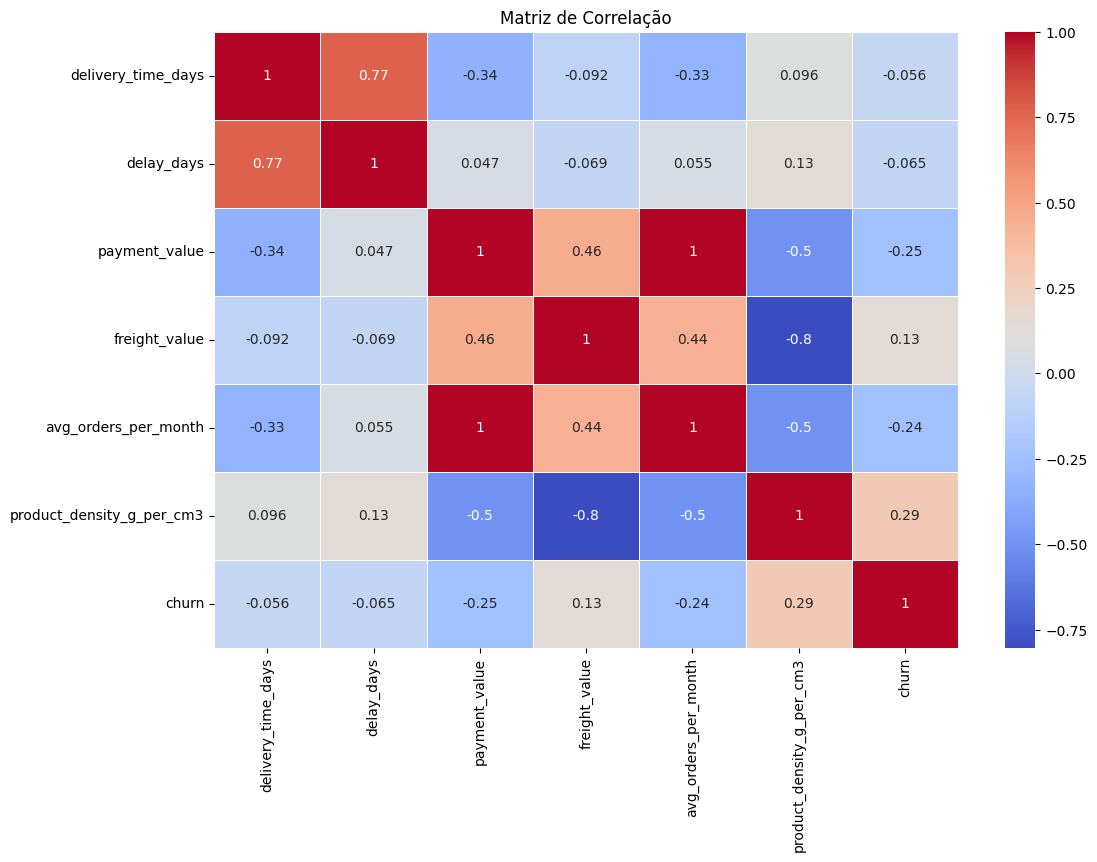

In [ ]:
# Inner join entre 'pedidos_df' e 'clientes_df' utilizando 'customer_id'
pedidos_clientes_df = pd.merge(
    pedidos_df[['order_id', 'customer_id', 'order_purchase_timestamp']],
    clientes_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Calcular a quantidade de pedidos por cliente
qtde_pedidos_por_cliente = pedidos_clientes_df.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Definir churn como clientes que não fizeram novos pedidos após um determinado período
pedidos_clientes_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_clientes_df['order_purchase_timestamp'])
pedidos_clientes_df['ano_mes'] = pedidos_clientes_df['order_purchase_timestamp'].dt.to_period('M')

# Calcular churn mensal
churn_mensal = pedidos_clientes_df.groupby('ano_mes')['customer_unique_id'].nunique().diff().fillna(0)
churn_mensal = churn_mensal.apply(lambda x: abs(x) if x < 0 else 0)

# Convertendo códigos postais e IDs para strings, e garantindo consistência
clientes_df['customer_zip_code_prefix'] = clientes_df['customer_zip_code_prefix'].astype(str).str.strip().str.lower()
vendedores_df['seller_zip_code_prefix'] = vendedores_df['seller_zip_code_prefix'].astype(str).str.strip().str.lower()
itens_pedidos_df['product_id'] = itens_pedidos_df['product_id'].astype(str).str.strip().str.lower()
produtos_df['product_id'] = produtos_df['product_id'].astype(str).str.strip().str.lower()

# Calculando o tamanho cúbico dos produtos e adicionando como uma nova coluna
produtos_df['product_volume_cm3'] = produtos_df['product_length_cm'] * produtos_df['product_height_cm'] * produtos_df['product_width_cm']

# Tratando valores de peso e volume zerados para evitar divisão por zero
produtos_df = produtos_df[(produtos_df['product_weight_g'] > 0) & (produtos_df['product_volume_cm3'] > 0)].copy()

# Calculando a densidade dos produtos (peso / volume) e adicionando como uma nova coluna
produtos_df['product_density_g_per_cm3'] = produtos_df['product_weight_g'] / produtos_df['product_volume_cm3']

# Unindo itens_pedidos_df com produtos_df para trazer informações dos produtos
itens_pedidos_produtos_df = itens_pedidos_df.merge(
    produtos_df[['product_id', 'product_weight_g', 'product_volume_cm3']],
    on='product_id',
    how='left'
)

# Verificando se todos os product_id em itens_pedidos_df têm correspondência em produtos_df
produtos_nao_correspondentes = itens_pedidos_df[~itens_pedidos_df['product_id'].isin(produtos_df['product_id'])]
print(f"Quantidade de product_id em itens_pedidos_df que não possuem correspondência em produtos_df: {produtos_nao_correspondentes['product_id'].nunique()}")

# Unindo pedidos_df com itens_pedidos_produtos_df para trazer as informações dos itens do pedido
pedidos_itens_df = pedidos_df.merge(
    itens_pedidos_produtos_df,
    on='order_id',
    how='left'
)

# Unindo pedidos_itens_df com pagamentos_df para trazer as informações dos pagamentos
pedidos_itens_pagamentos_df = pedidos_itens_df.merge(
    pagamentos_df[['order_id', 'payment_value', 'payment_installments']],
    on='order_id',
    how='left'
)

# Unindo pedidos_itens_pagamentos_df com clientes_df para trazer informações dos clientes
pedidos_completo_df = pedidos_itens_pagamentos_df.merge(
    clientes_df[['customer_id', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
)

# Unindo pedidos_completo_df com vendedores_df para trazer informações dos vendedores
pedidos_completo_df = pedidos_completo_df.merge(
    vendedores_df[['seller_id', 'seller_zip_code_prefix']],
    on='seller_id',
    how='left'
)

# Calculando o tempo de entrega em dias
df_completo_com_tempo = pedidos_completo_df.copy()
df_completo_com_tempo['order_delivered_customer_date'] = pd.to_datetime(df_completo_com_tempo['order_delivered_customer_date'])
df_completo_com_tempo['order_purchase_timestamp'] = pd.to_datetime(df_completo_com_tempo['order_purchase_timestamp'])
df_completo_com_tempo['order_estimated_delivery_date'] = pd.to_datetime(df_completo_com_tempo['order_estimated_delivery_date'])

# Tempo de entrega em dias
df_completo_com_tempo['delivery_time_days'] = (df_completo_com_tempo['order_delivered_customer_date'] - df_completo_com_tempo['order_purchase_timestamp']).dt.days

# Tempo de atraso em dias
df_completo_com_tempo['delay_days'] = (df_completo_com_tempo['order_delivered_customer_date'] - df_completo_com_tempo['order_estimated_delivery_date']).dt.days

# Criando uma coluna com o mês do pedido
df_completo_com_tempo['month'] = df_completo_com_tempo['order_purchase_timestamp'].dt.to_period('M')

# Agrupando por mês e calculando as métricas
monthly_metrics = df_completo_com_tempo.groupby('month').agg({
    'delivery_time_days': 'mean',
    'delay_days': 'mean',
    'payment_value': 'sum',
    'product_volume_cm3': 'sum',
    'product_weight_g': 'sum',
    'order_id': 'count',
    'freight_value': 'mean'
}).reset_index()

# Calculando a média de pedidos por mês
monthly_metrics['avg_orders_per_month'] = monthly_metrics['order_id']

# Calculando a densidade média por mês
monthly_metrics['product_density_g_per_cm3'] = monthly_metrics['product_weight_g'] / monthly_metrics['product_volume_cm3']

# Adicionando o churn mensal ao DataFrame de métricas mensais
monthly_metrics = monthly_metrics.set_index('month').join(churn_mensal.rename('churn')).reset_index()

# Substituindo o DataFrame original pelo atualizado
pedidos_completo_df = df_completo_com_tempo

# Verificando valores nulos no DataFrame resultante
print("Valores nulos por coluna no DataFrame resultante:")
print(pedidos_completo_df.isnull().sum())

# Removendo pedidos que possuem informações incompletas
pedidos_completo_df = pedidos_completo_df.dropna()

# Selecionando apenas colunas numéricas do DataFrame de métricas mensais para calcular a correlação, excluindo variáveis óbvias ou redundantes
monthly_metrics_numeric = monthly_metrics.drop(columns=['order_id', 'product_volume_cm3', 'product_weight_g']).select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação com métricas mensais
correlation_matrix = monthly_metrics_numeric.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# IV - Preparação do Dataframe

In [ ]:
import pandas as pd
import numpy as np

# --- Preparação dos Dados ---

# Verificar se 'customer_unique_id' já está em 'pedidos_df'
print("Verificando colunas em 'pedidos_df' antes do merge...")

# Realizar o merge apenas se 'customer_unique_id' não estiver presente
if 'customer_unique_id' not in pedidos_df.columns:
    pedidos_df = pedidos_df.merge(
        clientes_df[['customer_id', 'customer_unique_id']],
        on='customer_id',
        how='left'
    )

# Remover colunas duplicadas criadas durante o merge
pedidos_df = pedidos_df.loc[:, ~pedidos_df.columns.duplicated()]

# Converter 'order_purchase_timestamp' para datetime se necessário
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'])

# Calcular a data mais recente no conjunto de dados
data_base = pedidos_df['order_purchase_timestamp'].max()

# Calcular Recência (dias desde a última compra de cada cliente)
recencia_df = pedidos_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recencia_df['recencia'] = (data_base - recencia_df['order_purchase_timestamp']).dt.days

# Calcular Frequência (número de pedidos de cada cliente)
frequencia_df = pedidos_df.groupby('customer_unique_id').size().reset_index(name='frequencia')

# Unir as métricas em um único DataFrame sem 'valor_monetario'
clientes_rfm = recencia_df.merge(frequencia_df, on='customer_unique_id')

# Definir 'churn' como 1 para clientes que fizeram apenas uma compra
clientes_rfm['churn'] = clientes_rfm['frequencia'].apply(lambda x: 1 if x == 1 else 0)

# --- Cálculo do volume e densidade do produto ---

dimensoes = ['product_length_cm', 'product_height_cm', 'product_width_cm']
for dim in dimensoes:
    produtos_df[dim] = produtos_df[dim].replace(0, np.nan)

# Calcular o volume do produto
produtos_df['product_volume_cm3'] = (
    produtos_df['product_length_cm'] *
    produtos_df['product_height_cm'] *
    produtos_df['product_width_cm']
)

# Substituir zeros em 'product_weight_g' por NaN
produtos_df['product_weight_g'] = produtos_df['product_weight_g'].replace(0, np.nan)

# Calcular a densidade do produto
produtos_df['product_density_g_per_cm3'] = produtos_df['product_weight_g'] / produtos_df['product_volume_cm3']



# --- Unir DataFrames ---

# Unir 'itens_pedidos_df' com 'produtos_df'
itens_pedidos_produtos_df = itens_pedidos_df.merge(
    produtos_df[['product_id', 'product_category', 'product_density_g_per_cm3']],
    on='product_id',
    how='left'
)

# Unir 'pedidos_df' com 'itens_pedidos_produtos_df'
pedidos_itens_df = pedidos_df.merge(
    itens_pedidos_produtos_df,
    on='order_id',
    how='left'
)

# Unir com 'clientes_rfm' usando 'customer_unique_id'
pedidos_itens_df = pedidos_itens_df.merge(
    clientes_rfm[['customer_unique_id', 'recencia', 'frequencia', 'churn']],
    on='customer_unique_id',
    how='left'
)

Verificando colunas em 'pedidos_df' antes do merge...


# V - Checagem

### 5.1 - .Head()

In [ ]:
pedidos_itens_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,product_density_g_per_cm3,recencia,frequencia,churn
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,0.253036,380,2,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,0.085233,84,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotive,0.043860,70,1,1


### 5.2 - .Columns()

In [ ]:
itens_pedidos_produtos_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_category',
       'product_density_g_per_cm3'],
      dtype='object')

###5.3 - .Info()

In [ ]:
pedidos_itens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   order_item_id                  98666 non-null  object        
 10  product_id                     98666 non-null  object        
 11  seller_id      

# VI - Normalizações


### 6.1 - Imputações

### 6.1.1 - Tratando valores na coluna 'product_density_g_per_cm3'

Utilizando a média da densidade de cada categoria de produto para imputação em suas respectivas categorias

In [ ]:
pedidos_itens_df['product_density_g_per_cm3'] = pedidos_itens_df.groupby('product_category')['product_density_g_per_cm3'].transform(
    lambda x: x.fillna(x.mean())
)

Alguns pedidos não possuem categoria, logo tirar a média da densidade por categoria para imputar não seria eficiente para todas as linhas.

In [ ]:
# Exibir as primeiras 10 linhas com valores NaN na coluna 'product_density_g_per_cm3'
print("Primeiras 10 linhas com valores NaN em 'product_density_g_per_cm3':")
display(pedidos_itens_df[pedidos_itens_df['product_density_g_per_cm3'].isnull()].head(3))

Primeiras 10 linhas com valores NaN em 'product_density_g_per_cm3':


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,product_density_g_per_cm3,recencia,frequencia,churn
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9,16.05,NaN,NaN,554,1,1
107,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,34c58672601f2c6d29db7efd1f6bf958,1,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,2018-01-31 22:16:18,27.3,15.10,NaN,NaN,262,1,1
180,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,5cbf29b2dcf212a6a5d864b887238c72,1,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.0,14.16,NaN,NaN,399,1,1


Linhas sem categoria de produto para imputação da densidade média serão removidas

In [ ]:
# Contar a quantidade de linhas que serão removidas (sem densidade e sem categorias)
linhas_para_remover = pedidos_itens_df[(pedidos_itens_df['product_density_g_per_cm3'].isnull()) & (pedidos_itens_df['product_category'].isnull())].shape[0]
print(f'Quantidade de registros que serão removidos: {linhas_para_remover}')

Quantidade de registros que serão removidos: 2191


In [ ]:
# Remover as linhas sem densidade e sem categoria
pedidos_itens_df = pedidos_itens_df[~((pedidos_itens_df['product_density_g_per_cm3'].isnull()) & (pedidos_itens_df['product_category'].isnull()))]

In [ ]:
# Contar a quantidade de linhas com churn 0 na lista de linhas com NaN em 'product_density_g_per_cm3'
churn_0_count = pedidos_itens_df[(pedidos_itens_df['product_density_g_per_cm3'].isnull()) & (pedidos_itens_df['churn'] == 0)].shape[0]
print(f'Quantidade de linhas com churn 0: {churn_0_count}')

Quantidade de linhas com churn 0: 0


### 6.1.2 - Tratando valores na coluna 'freight_value'


Imputação por constante '0'.

In [ ]:
pedidos_itens_df['freight_value'] = pedidos_itens_df['freight_value'].fillna(0)

<ipython-input-109-4cc724966431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_itens_df['freight_value'] = pedidos_itens_df['freight_value'].fillna(0)


In [ ]:
# Definir features numéricas para normalização
numerical_features = ['recencia', 'frequencia', 'freight_value', 'product_density_g_per_cm3']


# Criar o preprocessor apenas com StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# VII - Teste de modelos

# Mitigando Overfitting

# Avaliação do Modelo com Métricas Adicionais


# Teste random forest

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Supondo que 'pedidos_itens_df' já está definido e contém as features e o target
# Definir features e target para o modelo
features = [
    'recencia', 'freight_value', 'product_category', 'product_density_g_per_cm3'
]
target = 'churn'

# Garantir que todas as features estão presentes no DataFrame
features = [feature for feature in features if feature in pedidos_itens_df.columns]
print(f'Features consideradas: {features}')

# Definir X e y para o modelo
X = pedidos_itens_df[features]
y = pedidos_itens_df[target]

# Codificar a variável categórica 'product_category'
if 'product_category' in X.columns:
    X = pd.get_dummies(X, columns=['product_category'], drop_first=True)

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Número de amostras em X_train: {len(X_train)}, X_test: {len(X_test)}')

# Balancear as classes usando SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir as features numéricas
numerical_features = ['recencia', 'freight_value', 'product_density_g_per_cm3']
numerical_features = [feature for feature in numerical_features if feature in X_train.columns]

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Criar o pipeline com Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42))
])

# Treinar o modelo com os dados balanceados
pipeline_rf.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de teste
y_pred = pipeline_rf.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Calcular a AUC-ROC
y_pred_proba = pipeline_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.2f}')


Features consideradas: ['recencia', 'freight_value', 'product_category', 'product_density_g_per_cm3']
Número de amostras em X_train: 77800, X_test: 19450
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.10      0.36      0.16      1201
           1       0.95      0.79      0.86     18249

    accuracy                           0.76     19450
   macro avg       0.52      0.57      0.51     19450
weighted avg       0.90      0.76      0.82     19450

Matriz de Confusão:
[[  433   768]
 [ 3912 14337]]
AUC-ROC: 0.61


# Teste XGBoost

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Supondo que 'pedidos_itens_df' já está definido e contém as features e o target
# Definir features e target para o modelo
features = [
    'recencia', 'freight_value', 'product_category', 'product_density_g_per_cm3'
]
target = 'churn'

# Garantir que todas as features estão presentes no DataFrame
features = [feature for feature in features if feature in pedidos_itens_df.columns]
print(f'Features consideradas: {features}')

# Definir X e y para o modelo
X = pedidos_itens_df[features]
y = pedidos_itens_df[target]

# Codificar a variável categórica 'product_category'
if 'product_category' in X.columns:
    X = pd.get_dummies(X, columns=['product_category'], drop_first=True)

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Número de amostras em X_train: {len(X_train)}, X_test: {len(X_test)}')

# Balancear as classes usando SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir as features numéricas
numerical_features = ['recencia', 'freight_value', 'product_density_g_per_cm3']
numerical_features = [feature for feature in numerical_features if feature in X_train.columns]

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Calcular o peso das classes para o XGBoost
from collections import Counter
counter = Counter(y_train_resampled)
scale_pos_weight = counter[0] / counter[1]

# Criar o pipeline com XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42))
])

# Treinar o modelo com os dados balanceados
pipeline_xgb.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no conjunto de teste
y_pred = pipeline_xgb.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Calcular a AUC-ROC
y_pred_proba = pipeline_xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.2f}')


Features consideradas: ['recencia', 'freight_value', 'product_category', 'product_density_g_per_cm3']
Número de amostras em X_train: 77800, X_test: 19450


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.15      0.03      0.04      1201
           1       0.94      0.99      0.96     18249

    accuracy                           0.93     19450
   macro avg       0.54      0.51      0.50     19450
weighted avg       0.89      0.93      0.91     19450

Matriz de Confusão:
[[   31  1170]
 [  175 18074]]
AUC-ROC: 0.63


 # Futuras melhorias:
Concluir a avaliação da Seção VII, pois o modelo de regressão logística padrão indicou scores muito altos típicos de overfitting.
